### Table of Contents

* [Doctor's appointments (show/no show)](#Title)
    * [Introduction](#Introduction)
    * [Data Wrangling](#DataWrangling)
        * [Dataset Reading](#DataReading)
        * [Data Assessing](#DataAssessing)
        * [Data Cleaning](#DataCleaning)
* [Exploratory Data Analysis](#EDA)
    * [Question #1](#Q1)
    * [Question #2](#Q2)
    * [Conclusion](#Conclusion)

# No-show Medical Appointments <a id="Title"></a>

## Introduction <a id="Introduction"></a>

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. <br>
A number of characteristics about the patient are included in each row. <br>
● "ScheduledDay" tells us on what day the patient set up their appointment. <br>
● "Neighborhood" indicates the location of the hospital.<br>
● "Scholarship" indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família. <br>
● Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up


The project clearly states one or more questions:

## Data Wrangling <a id="DataWrangling"></a>

In [2]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3 style="color:blue"> Data Reading<h2> <a id="DataReading"></a>

In [3]:
data= pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [4]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<h3 style="color:blue"> Data Assessing</h3> <a id="DataAssessing"></a>

* We are searching here for 2 issues:
    * data quality (complete, unique, valid, timely, and consistent in order to be useful for decision making.)
    * lack of tidiness:
        * Headers contain values instead of categories or names
        * Columns contain more than one set of data
        * Rows and columns are both used to store variables
        * Charts store and display multiple data fields
        * One observation/conclusion is stored across multiple tables

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
data.shape

(110527, 14)

In [8]:
#checking for null values
data.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

<p style="color:green">  no null values so data is complete</p>

In [9]:
# now we check for number of duplicates in data
sum(data.duplicated())

0

<p style="color: green"> data is free of redundency </p>

<h3 style="color:blue"> Data Cleaning</h3> <a id="DataCleaning"></a>

<p style="color: red">- Handcap is a numeric value. Because it's indicating number of disabilities</p>

In [10]:
data['Handcap']=data['Handcap'].astype('int64')

<p style="color: red">-  Gender, Scholarship, Hipertension, Diabetes, Alcoholism, Handcap, SMS_received, No-show must be categorical variables.</p>
- solution:

In [11]:
boolColumns = ['Gender', 'Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'SMS_received','No-show']
for col in boolColumns:
    data[col] = data[col].astype('category')

In [12]:
for col in boolColumns:
    print(col)
    print(data[col].unique())

Gender
['F', 'M']
Categories (2, object): ['F', 'M']
Scholarship
[0, 1]
Categories (2, int64): [0, 1]
Hipertension
[1, 0]
Categories (2, int64): [1, 0]
Diabetes
[0, 1]
Categories (2, int64): [0, 1]
Alcoholism
[0, 1]
Categories (2, int64): [0, 1]
SMS_received
[0, 1]
Categories (2, int64): [0, 1]
No-show
['No', 'Yes']
Categories (2, object): ['No', 'Yes']


<p style="color: red">- PatientId & AppointmentID must be object variables because they're identification variables no need for them to be numeric.</p>
- solution:

In [13]:
objColumns = ['PatientId', 'AppointmentID']
for col in objColumns: 
    data[col] = data[col].astype(object)

<p style="color: red">- ScheduledDay & AppointmentDay must be timestamp</p>
- solution:

In [14]:
data['ScheduledDayTime'] = pd.to_datetime(data['ScheduledDay']).dt.time
data['ScheduledDay'] = pd.to_datetime(data['ScheduledDay']).dt.date
data['AppointmentDay'] = pd.to_datetime(data['AppointmentDay']).dt.date


<p style="color: red">- Neighbourhood should be string</p>
- solution:

In [15]:
data['Neighbourhood'] = data['Neighbourhood'].astype(str)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   PatientId         110527 non-null  object  
 1   AppointmentID     110527 non-null  object  
 2   Gender            110527 non-null  category
 3   ScheduledDay      110527 non-null  object  
 4   AppointmentDay    110527 non-null  object  
 5   Age               110527 non-null  int64   
 6   Neighbourhood     110527 non-null  object  
 7   Scholarship       110527 non-null  category
 8   Hipertension      110527 non-null  category
 9   Diabetes          110527 non-null  category
 10  Alcoholism        110527 non-null  category
 11  Handcap           110527 non-null  int64   
 12  SMS_received      110527 non-null  category
 13  No-show           110527 non-null  category
 14  ScheduledDayTime  110527 non-null  object  
dtypes: category(7), int64(2), object(6)
memory usage: 7

In [17]:
data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,ScheduledDayTime
0,2.98725e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,18:38:08
1,5.58998e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,16:08:27
2,4.26296e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,16:19:04
3,8.67951e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,17:29:31
4,8.84119e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,16:07:23


<p style="color:green">Now our data is almost consistent and cleaned (no null values) and we can work on it.</p>

## Exploratory Data Analysis <a id="EDA"></a>

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Handcap'}>]], dtype=object)

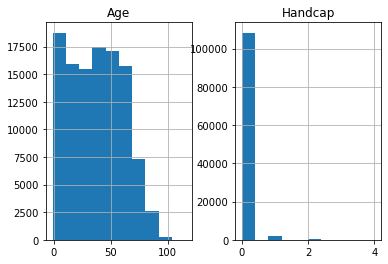

In [18]:
data.hist()

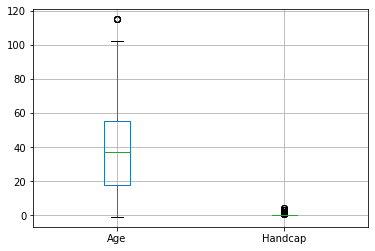

In [21]:
data.boxplot();

<h3 style="color:blue">Question #1</h3> <a id="Q1"></a>
what gender is most likely to miss their appointment?

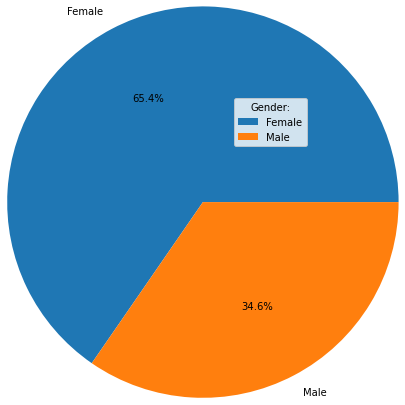

In [19]:
noShow = data[data['No-show']=='Yes']
values = noShow.groupby('Gender')['No-show'].value_counts()
plt.pie(values,labels=['Female', 'Male'], autopct='%1.1f%%', radius = 1.5*1.5);
plt.legend(title = "Gender:");

<h3 style="color:blue">Question #2</h3> <a id="Q2"></a>
how many people did show to their appointments and how many didn't?

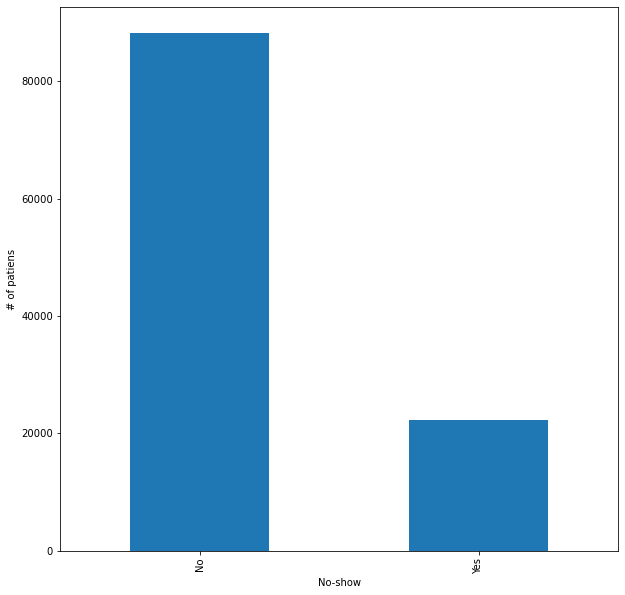

In [20]:
data.groupby('No-show')['PatientId'].count().plot(ylabel='# of patiens', kind = 'bar', figsize=(10,10));

<h3 style="color:blue">Conclusion</h3> <a id="Conclusion"></a>

* After analyzing the dataset we concluded that:
    * it seems that Females are more likely to not show up for their appointments
    * most of the patiens don't show up to their appointments